In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [47]:
#load dataset
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
abalone = pd.read_csv(url, header=None)
abalone.columns = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
abalone.Sex = abalone.Sex.map({'M':0, 'F':1, 'I':2})
abalone

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [48]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


In [49]:
abalone.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


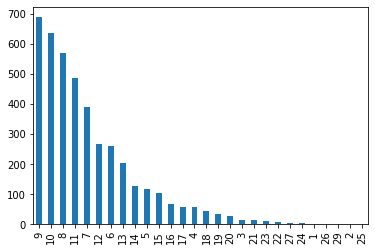

In [50]:
abalone['Rings'].value_counts().plot(kind='bar')

In [51]:
abalone.corr()['Rings'].sort_values()

Sex              -0.351822
Shucked weight    0.420884
Viscera weight    0.503819
Whole weight      0.540390
Length            0.556720
Height            0.557467
Diameter          0.574660
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [52]:
# remove features "Sex" (it isn't a physical measurement) and "Shucked weight" (correlation under an arbitrary threshold of 0.5)

abalone = abalone.drop(["Sex", "Shucked weight"], axis=1)

In [53]:
X = abalone.iloc[:, :-1].values
y = abalone.iloc[:, -1].values

In [54]:
X

array([[0.455 , 0.365 , 0.095 , 0.514 , 0.101 , 0.15  ],
       [0.35  , 0.265 , 0.09  , 0.2255, 0.0485, 0.07  ],
       [0.53  , 0.42  , 0.135 , 0.677 , 0.1415, 0.21  ],
       ...,
       [0.6   , 0.475 , 0.205 , 1.176 , 0.2875, 0.308 ],
       [0.625 , 0.485 , 0.15  , 1.0945, 0.261 , 0.296 ],
       [0.71  , 0.555 , 0.195 , 1.9485, 0.3765, 0.495 ]])

In [55]:
y

array([15,  7,  9, ...,  9, 10, 12])

In [56]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [57]:
scoring = ['accuracy', 'precision_micro', 'recall_micro', 'f1_micro']
accuracy_mean = {}
accuracy_std = {}
precision_mean = {}
precision_std = {}
recall_mean = {}
recall_std = {}
f_measure_mean = {}
f_measure_std = {}
fit_time = {}

**KNN**

In [58]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn3 = KNeighborsClassifier(n_neighbors=3)
knn5 = KNeighborsClassifier(n_neighbors=5)

In [59]:
#knn1
scores = cross_validate(knn1, X, y, cv=3, scoring=scoring)
accuracy_mean['knn1'] = scores['test_accuracy'].mean()
accuracy_std['knn1'] = scores['test_accuracy'].std()
precision_mean['knn1'] = scores['test_precision_micro'].mean()
precision_std['knn1'] = scores['test_precision_micro'].std()
recall_mean['knn1'] = scores['test_recall_micro'].mean()
recall_std['knn1'] = scores['test_recall_micro'].std()
f_measure_mean['knn1'] = scores['test_f1_micro'].mean()
f_measure_std['knn1'] = scores['test_f1_micro'].std()
fit_time['knn1'] = scores['fit_time'].mean()*1000

#knn3
scores = cross_validate(knn3, X, y, cv=3, scoring=scoring)
accuracy_mean['knn3'] = scores['test_accuracy'].mean()
accuracy_std['knn3'] = scores['test_accuracy'].std()
precision_mean['knn3'] = scores['test_precision_micro'].mean()
precision_std['knn3'] = scores['test_precision_micro'].std()
recall_mean['knn3'] = scores['test_recall_micro'].mean()
recall_std['knn3'] = scores['test_recall_micro'].std()
f_measure_mean['knn3'] = scores['test_f1_micro'].mean()
f_measure_std['knn3'] = scores['test_f1_micro'].std()
fit_time['knn3'] = scores['fit_time'].mean()*1000

#knn5
scores = cross_validate(knn5, X, y, cv=3, scoring=scoring)
accuracy_mean['knn5'] = scores['test_accuracy'].mean()
accuracy_std['knn5'] = scores['test_accuracy'].std()
precision_mean['knn5'] = scores['test_precision_micro'].mean()
precision_std['knn5'] = scores['test_precision_micro'].std()
recall_mean['knn5'] = scores['test_recall_micro'].mean()
recall_std['knn5'] = scores['test_recall_micro'].std()
f_measure_mean['knn5'] = scores['test_f1_micro'].mean()
f_measure_std['knn5'] = scores['test_f1_micro'].std()
fit_time['knn5'] = scores['fit_time'].mean()*1000

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


**Decision Tree**

In [60]:
DT_IG = DecisionTreeClassifier(criterion='entropy')
DT_Gini = DecisionTreeClassifier(criterion='gini')

In [61]:
#Information Gain
scores = cross_validate(DT_IG, X, y, cv=3, scoring=scoring)
accuracy_mean['DT_IG'] = scores['test_accuracy'].mean()
accuracy_std['DT_IG'] = scores['test_accuracy'].std()
precision_mean['DT_IG'] = scores['test_precision_micro'].mean()
precision_std['DT_IG'] = scores['test_precision_micro'].std()
recall_mean['DT_IG'] = scores['test_recall_micro'].mean()
recall_std['DT_IG'] = scores['test_recall_micro'].std()
f_measure_mean['DT_IG'] = scores['test_f1_micro'].mean()
f_measure_std['DT_IG'] = scores['test_f1_micro'].std()
fit_time['DT_IG'] = scores['fit_time'].mean()*1000

#Gini
scores = cross_validate(DT_Gini, X, y, cv=3, scoring=scoring)
accuracy_mean['DT_Gini'] = scores['test_accuracy'].mean()
accuracy_std['DT_Gini'] = scores['test_accuracy'].std()
precision_mean['DT_Gini'] = scores['test_precision_micro'].mean()
precision_std['DT_Gini'] = scores['test_precision_micro'].std()
recall_mean['DT_Gini'] = scores['test_recall_micro'].mean()
recall_std['DT_Gini'] = scores['test_recall_micro'].std()
f_measure_mean['DT_Gini'] = scores['test_f1_micro'].mean()
f_measure_std['DT_Gini'] = scores['test_f1_micro'].std()
fit_time['DT_Gini'] = scores['fit_time'].mean()*1000

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


**Naive Bayes**

In [62]:
NB = GaussianNB()

In [63]:
#GaussianNB
scores = cross_validate(NB, X, y, cv=3, scoring=scoring)
accuracy_mean['NB'] = scores['test_accuracy'].mean()
accuracy_std['NB'] = scores['test_accuracy'].std()
precision_mean['NB'] = scores['test_precision_micro'].mean()
precision_std['NB'] = scores['test_precision_micro'].std()
recall_mean['NB'] = scores['test_recall_micro'].mean()
recall_std['NB'] = scores['test_recall_micro'].std()
f_measure_mean['NB'] = scores['test_f1_micro'].mean()
f_measure_std['NB'] = scores['test_f1_micro'].std()
fit_time['NB'] = scores['fit_time'].mean()*1000

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


**SVM**

In [64]:
Clsfr_rbf = SVC(kernel = 'rbf')
Clsfr_poly = SVC(kernel = 'poly')
Clsfr_sigmoid = SVC(kernel = 'sigmoid')

In [65]:
#kernel = 'rbf'
scores = cross_validate(Clsfr_rbf, X, y, cv=3, scoring=scoring)
accuracy_mean['Clsfr_rbf'] = scores['test_accuracy'].mean()
accuracy_std['Clsfr_rbf'] = scores['test_accuracy'].std()
precision_mean['Clsfr_rbf'] = scores['test_precision_micro'].mean()
precision_std['Clsfr_rbf'] = scores['test_precision_micro'].std()
recall_mean['Clsfr_rbf'] = scores['test_recall_micro'].mean()
recall_std['Clsfr_rbf'] = scores['test_recall_micro'].std()
f_measure_mean['Clsfr_rbf'] = scores['test_f1_micro'].mean()
f_measure_std['Clsfr_rbf'] = scores['test_f1_micro'].std()
fit_time['Clsfr_rbf'] = scores['fit_time'].mean()*1000

#kernel = 'poly'
scores = cross_validate(Clsfr_poly, X, y, cv=3, scoring=scoring)
accuracy_mean['Clsfr_poly'] = scores['test_accuracy'].mean()
accuracy_std['Clsfr_poly'] = scores['test_accuracy'].std()
precision_mean['Clsfr_poly'] = scores['test_precision_micro'].mean()
precision_std['Clsfr_poly'] = scores['test_precision_micro'].std()
recall_mean['Clsfr_poly'] = scores['test_recall_micro'].mean()
recall_std['Clsfr_poly'] = scores['test_recall_micro'].std()
f_measure_mean['Clsfr_poly'] = scores['test_f1_micro'].mean()
f_measure_std['Clsfr_poly'] = scores['test_f1_micro'].std()
fit_time['Clsfr_poly'] = scores['fit_time'].mean()*1000

#kernel = 'sigmoid'
scores = cross_validate(Clsfr_sigmoid, X, y, cv=3, scoring=scoring)
accuracy_mean['Clsfr_sigmoid'] = scores['test_accuracy'].mean()
accuracy_std['Clsfr_sigmoid'] = scores['test_accuracy'].std()
precision_mean['Clsfr_sigmoid'] = scores['test_precision_micro'].mean()
precision_std['Clsfr_sigmoid'] = scores['test_precision_micro'].std()
recall_mean['Clsfr_sigmoid'] = scores['test_recall_micro'].mean()
recall_std['Clsfr_sigmoid'] = scores['test_recall_micro'].std()
f_measure_mean['Clsfr_sigmoid'] = scores['test_f1_micro'].mean()
f_measure_std['Clsfr_sigmoid'] = scores['test_f1_micro'].std()
fit_time['Clsfr_sigmoid'] = scores['fit_time'].mean()*1000

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


**Ensemble**

In [66]:
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)), 
              ('knn5', KNeighborsClassifier(n_neighbors=5)), 
              ('nb', GaussianNB())
]
ensemble = StackingClassifier(estimators=estimators)

In [67]:
#ensemble
scores = cross_validate(ensemble, X, y, cv=3, scoring=scoring)
accuracy_mean['ensemble'] = scores['test_accuracy'].mean()
accuracy_std['ensemble'] = scores['test_accuracy'].std()
precision_mean['ensemble'] = scores['test_precision_micro'].mean()
precision_std['ensemble'] = scores['test_precision_micro'].std()
recall_mean['ensemble'] = scores['test_recall_micro'].mean()
recall_std['ensemble'] = scores['test_recall_micro'].std()
f_measure_mean['ensemble'] = scores['test_f1_micro'].mean()
f_measure_std['ensemble'] = scores['test_f1_micro'].std()
fit_time['ensemble'] = scores['fit_time'].mean()*1000

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:1097: RuntimeWarning: Number of classes in training fold (25) does not match total number of classes (27). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  RuntimeWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:1097: RuntimeWarning: Number of classes in training fold (25) does not match total number of classes (27). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resul

#**PCA**

In [68]:
pca = PCA(n_components = 4)
pca.fit(X)
X_pca = pca.transform(X)

**PCA - KNN**


In [69]:
#knn1
scores = cross_validate(knn1, X_pca, y, cv=3, scoring=scoring)
accuracy_mean['knn1_pca'] = scores['test_accuracy'].mean()
accuracy_std['knn1_pca'] = scores['test_accuracy'].std()
precision_mean['knn1_pca'] = scores['test_precision_micro'].mean()
precision_std['knn1_pca'] = scores['test_precision_micro'].std()
recall_mean['knn1_pca'] = scores['test_recall_micro'].mean()
recall_std['knn1_pca'] = scores['test_recall_micro'].std()
f_measure_mean['knn1_pca'] = scores['test_f1_micro'].mean()
f_measure_std['knn1_pca'] = scores['test_f1_micro'].std()
fit_time['knn1_pca'] = scores['fit_time'].mean()*1000

#knn3
scores = cross_validate(knn3, X_pca, y, cv=3, scoring=scoring)
accuracy_mean['knn3_pca'] = scores['test_accuracy'].mean()
accuracy_std['knn3_pca'] = scores['test_accuracy'].std()
precision_mean['knn3_pca'] = scores['test_precision_micro'].mean()
precision_std['knn3_pca'] = scores['test_precision_micro'].std()
recall_mean['knn3_pca'] = scores['test_recall_micro'].mean()
recall_std['knn3_pca'] = scores['test_recall_micro'].std()
f_measure_mean['knn3_pca'] = scores['test_f1_micro'].mean()
f_measure_std['knn3_pca'] = scores['test_f1_micro'].std()
fit_time['knn3_pca'] = scores['fit_time'].mean()*1000

#knn5
scores = cross_validate(knn5, X_pca, y, cv=3, scoring=scoring)
accuracy_mean['knn5_pca'] = scores['test_accuracy'].mean()
accuracy_std['knn5_pca'] = scores['test_accuracy'].std()
precision_mean['knn5_pca'] = scores['test_precision_micro'].mean()
precision_std['knn5_pca'] = scores['test_precision_micro'].std()
recall_mean['knn5_pca'] = scores['test_recall_micro'].mean()
recall_std['knn5_pca'] = scores['test_recall_micro'].std()
f_measure_mean['knn5_pca'] = scores['test_f1_micro'].mean()
f_measure_std['knn5_pca'] = scores['test_f1_micro'].std()
fit_time['knn5_pca'] = scores['fit_time'].mean()*1000

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


**PCA - Decision Tree**

In [70]:
#Information Gain
scores = cross_validate(DT_IG, X_pca, y, cv=3, scoring=scoring)
accuracy_mean['DT_IG_pca'] = scores['test_accuracy'].mean()
accuracy_std['DT_IG_pca'] = scores['test_accuracy'].std()
precision_mean['DT_IG_pca'] = scores['test_precision_micro'].mean()
precision_std['DT_IG_pca'] = scores['test_precision_micro'].std()
recall_mean['DT_IG_pca'] = scores['test_recall_micro'].mean()
recall_std['DT_IG_pca'] = scores['test_recall_micro'].std()
f_measure_mean['DT_IG_pca'] = scores['test_f1_micro'].mean()
f_measure_std['DT_IG_pca'] = scores['test_f1_micro'].std()
fit_time['DT_IG_pca'] = scores['fit_time'].mean()*1000

#Gini
scores = cross_validate(DT_Gini, X_pca, y, cv=3, scoring=scoring)
accuracy_mean['DT_Gini_pca'] = scores['test_accuracy'].mean()
accuracy_std['DT_Gini_pca'] = scores['test_accuracy'].std()
precision_mean['DT_Gini_pca'] = scores['test_precision_micro'].mean()
precision_std['DT_Gini_pca'] = scores['test_precision_micro'].std()
recall_mean['DT_Gini_pca'] = scores['test_recall_micro'].mean()
recall_std['DT_Gini_pca'] = scores['test_recall_micro'].std()
f_measure_mean['DT_Gini_pca'] = scores['test_f1_micro'].mean()
f_measure_std['DT_Gini_pca'] = scores['test_f1_micro'].std()
fit_time['DT_Gini_pca'] = scores['fit_time'].mean()*1000

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


**PCA - Naive Bayes**

In [71]:
#GaussianNB
scores = cross_validate(NB, X_pca, y, cv=3, scoring=scoring)
accuracy_mean['NB_pca'] = scores['test_accuracy'].mean()
accuracy_std['NB_pca'] = scores['test_accuracy'].std()
precision_mean['NB_pca'] = scores['test_precision_micro'].mean()
precision_std['NB_pca'] = scores['test_precision_micro'].std()
recall_mean['NB_pca'] = scores['test_recall_micro'].mean()
recall_std['NB_pca'] = scores['test_recall_micro'].std()
f_measure_mean['NB_pca'] = scores['test_f1_micro'].mean()
f_measure_std['NB_pca'] = scores['test_f1_micro'].std()
fit_time['NB_pca'] = scores['fit_time'].mean()*1000

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


**PCA - SVM**

In [72]:
#kernel = 'rbf'
scores = cross_validate(Clsfr_rbf, X_pca, y, cv=3, scoring=scoring)
accuracy_mean['Clsfr_rbf_pca'] = scores['test_accuracy'].mean()
accuracy_std['Clsfr_rbf_pca'] = scores['test_accuracy'].std()
precision_mean['Clsfr_rbf_pca'] = scores['test_precision_micro'].mean()
precision_std['Clsfr_rbf_pca'] = scores['test_precision_micro'].std()
recall_mean['Clsfr_rbf_pca'] = scores['test_recall_micro'].mean()
recall_std['Clsfr_rbf_pca'] = scores['test_recall_micro'].std()
f_measure_mean['Clsfr_rbf_pca'] = scores['test_f1_micro'].mean()
f_measure_std['Clsfr_rbf_pca'] = scores['test_f1_micro'].std()
fit_time['Clsfr_rbf_pca'] = scores['fit_time'].mean()*1000

#kernel = 'poly'
scores = cross_validate(Clsfr_poly, X_pca, y, cv=3, scoring=scoring)
accuracy_mean['Clsfr_poly_pca'] = scores['test_accuracy'].mean()
accuracy_std['Clsfr_poly_pca'] = scores['test_accuracy'].std()
precision_mean['Clsfr_poly_pca'] = scores['test_precision_micro'].mean()
precision_std['Clsfr_poly_pca'] = scores['test_precision_micro'].std()
recall_mean['Clsfr_poly_pca'] = scores['test_recall_micro'].mean()
recall_std['Clsfr_poly_pca'] = scores['test_recall_micro'].std()
f_measure_mean['Clsfr_poly_pca'] = scores['test_f1_micro'].mean()
f_measure_std['Clsfr_poly_pca'] = scores['test_f1_micro'].std()
fit_time['Clsfr_poly_pca'] = scores['fit_time'].mean()*1000

#kernel = 'sigmoid'
scores = cross_validate(Clsfr_sigmoid, X_pca, y, cv=3, scoring=scoring)
accuracy_mean['Clsfr_sigmoid_pca'] = scores['test_accuracy'].mean()
accuracy_std['Clsfr_sigmoid_pca'] = scores['test_accuracy'].std()
precision_mean['Clsfr_sigmoid_pca'] = scores['test_precision_micro'].mean()
precision_std['Clsfr_sigmoid_pca'] = scores['test_precision_micro'].std()
recall_mean['Clsfr_sigmoid_pca'] = scores['test_recall_micro'].mean()
recall_std['Clsfr_sigmoid_pca'] = scores['test_recall_micro'].std()
f_measure_mean['Clsfr_sigmoid_pca'] = scores['test_f1_micro'].mean()
f_measure_std['Clsfr_sigmoid_pca'] = scores['test_f1_micro'].std()
fit_time['Clsfr_sigmoid_pca'] = scores['fit_time'].mean()*1000

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


**PCA - Ensemble**

In [73]:
#ensemble
scores = cross_validate(ensemble, X_pca, y, cv=3, scoring=scoring)
accuracy_mean['ensemble_pca'] = scores['test_accuracy'].mean()
accuracy_std['ensemble_pca'] = scores['test_accuracy'].std()
precision_mean['ensemble_pca'] = scores['test_precision_micro'].mean()
precision_std['ensemble_pca'] = scores['test_precision_micro'].std()
recall_mean['ensemble_pca'] = scores['test_recall_micro'].mean()
recall_std['ensemble_pca'] = scores['test_recall_micro'].std()
f_measure_mean['ensemble_pca'] = scores['test_f1_micro'].mean()
f_measure_std['ensemble_pca'] = scores['test_f1_micro'].std()
fit_time['ensemble_pca'] = scores['fit_time'].mean()*1000

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:1097: RuntimeWarning: Number of classes in training fold (25) does not match total number of classes (27). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  RuntimeWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:1097: RuntimeWarning: Number of classes in training fold (25) does not match total number of classes (27). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resul

# **LDA**

In [74]:
lda = LinearDiscriminantAnalysis(n_components=4)
X_lda = lda.fit(X, y).transform(X)

**LDA - KNN**

In [75]:
#knn1
scores = cross_validate(knn1, X_lda, y, cv=3, scoring=scoring)
accuracy_mean['knn1_lda'] = scores['test_accuracy'].mean()
accuracy_std['knn1_lda'] = scores['test_accuracy'].std()
precision_mean['knn1_lda'] = scores['test_precision_micro'].mean()
precision_std['knn1_lda'] = scores['test_precision_micro'].std()
recall_mean['knn1_lda'] = scores['test_recall_micro'].mean()
recall_std['knn1_lda'] = scores['test_recall_micro'].std()
f_measure_mean['knn1_lda'] = scores['test_f1_micro'].mean()
f_measure_std['knn1_lda'] = scores['test_f1_micro'].std()
fit_time['knn1_lda'] = scores['fit_time'].mean()*1000

#knn3
scores = cross_validate(knn3, X_lda, y, cv=3, scoring=scoring)
accuracy_mean['knn3_lda'] = scores['test_accuracy'].mean()
accuracy_std['knn3_lda'] = scores['test_accuracy'].std()
precision_mean['knn3_lda'] = scores['test_precision_micro'].mean()
precision_std['knn3_lda'] = scores['test_precision_micro'].std()
recall_mean['knn3_lda'] = scores['test_recall_micro'].mean()
recall_std['knn3_lda'] = scores['test_recall_micro'].std()
f_measure_mean['knn3_lda'] = scores['test_f1_micro'].mean()
f_measure_std['knn3_lda'] = scores['test_f1_micro'].std()
fit_time['knn3_lda'] = scores['fit_time'].mean()*1000

#knn5
scores = cross_validate(knn5, X_lda, y, cv=3, scoring=scoring)
accuracy_mean['knn5_lda'] = scores['test_accuracy'].mean()
accuracy_std['knn5_lda'] = scores['test_accuracy'].std()
precision_mean['knn5_lda'] = scores['test_precision_micro'].mean()
precision_std['knn5_lda'] = scores['test_precision_micro'].std()
recall_mean['knn5_lda'] = scores['test_recall_micro'].mean()
recall_std['knn5_lda'] = scores['test_recall_micro'].std()
f_measure_mean['knn5_lda'] = scores['test_f1_micro'].mean()
f_measure_std['knn5_lda'] = scores['test_f1_micro'].std()
fit_time['knn5_lda'] = scores['fit_time'].mean()*1000

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


**LDA - Decision Tree**

In [76]:
#Information Gain
scores = cross_validate(DT_IG, X_lda, y, cv=3, scoring=scoring)
accuracy_mean['DT_IG_lda'] = scores['test_accuracy'].mean()
accuracy_std['DT_IG_lda'] = scores['test_accuracy'].std()
precision_mean['DT_IG_lda'] = scores['test_precision_micro'].mean()
precision_std['DT_IG_lda'] = scores['test_precision_micro'].std()
recall_mean['DT_IG_lda'] = scores['test_recall_micro'].mean()
recall_std['DT_IG_lda'] = scores['test_recall_micro'].std()
f_measure_mean['DT_IG_lda'] = scores['test_f1_micro'].mean()
f_measure_std['DT_IG_lda'] = scores['test_f1_micro'].std()
fit_time['DT_IG_lda'] = scores['fit_time'].mean()*1000

#Gini
scores = cross_validate(DT_Gini, X_lda, y, cv=3, scoring=scoring)
accuracy_mean['DT_Gini_lda'] = scores['test_accuracy'].mean()
accuracy_std['DT_Gini_lda'] = scores['test_accuracy'].std()
precision_mean['DT_Gini_lda'] = scores['test_precision_micro'].mean()
precision_std['DT_Gini_lda'] = scores['test_precision_micro'].std()
recall_mean['DT_Gini_lda'] = scores['test_recall_micro'].mean()
recall_std['DT_Gini_lda'] = scores['test_recall_micro'].std()
f_measure_mean['DT_Gini_lda'] = scores['test_f1_micro'].mean()
f_measure_std['DT_Gini_lda'] = scores['test_f1_micro'].std()
fit_time['DT_Gini_lda'] = scores['fit_time'].mean()*1000

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


**LDA - Naive Bayes**

In [77]:
#GaussianNB
scores = cross_validate(NB, X_lda, y, cv=3, scoring=scoring)
accuracy_mean['NB_lda'] = scores['test_accuracy'].mean()
accuracy_std['NB_lda'] = scores['test_accuracy'].std()
precision_mean['NB_lda'] = scores['test_precision_micro'].mean()
precision_std['NB_lda'] = scores['test_precision_micro'].std()
recall_mean['NB_lda'] = scores['test_recall_micro'].mean()
recall_std['NB_lda'] = scores['test_recall_micro'].std()
f_measure_mean['NB_lda'] = scores['test_f1_micro'].mean()
f_measure_std['NB_lda'] = scores['test_f1_micro'].std()
fit_time['NB_lda'] = scores['fit_time'].mean()*1000

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


**LDA - SVM**

In [78]:
#kernel = 'rbf'
scores = cross_validate(Clsfr_rbf, X_lda, y, cv=3, scoring=scoring)
accuracy_mean['Clsfr_rbf_lda'] = scores['test_accuracy'].mean()
accuracy_std['Clsfr_rbf_lda'] = scores['test_accuracy'].std()
precision_mean['Clsfr_rbf_lda'] = scores['test_precision_micro'].mean()
precision_std['Clsfr_rbf_lda'] = scores['test_precision_micro'].std()
recall_mean['Clsfr_rbf_lda'] = scores['test_recall_micro'].mean()
recall_std['Clsfr_rbf_lda'] = scores['test_recall_micro'].std()
f_measure_mean['Clsfr_rbf_lda'] = scores['test_f1_micro'].mean()
f_measure_std['Clsfr_rbf_lda'] = scores['test_f1_micro'].std()
fit_time['Clsfr_rbf_lda'] = scores['fit_time'].mean()*1000

#kernel = 'poly'
scores = cross_validate(Clsfr_poly, X_lda, y, cv=3, scoring=scoring)
accuracy_mean['Clsfr_poly_lda'] = scores['test_accuracy'].mean()
accuracy_std['Clsfr_poly_lda'] = scores['test_accuracy'].std()
precision_mean['Clsfr_poly_lda'] = scores['test_precision_micro'].mean()
precision_std['Clsfr_poly_lda'] = scores['test_precision_micro'].std()
recall_mean['Clsfr_poly_lda'] = scores['test_recall_micro'].mean()
recall_std['Clsfr_poly_lda'] = scores['test_recall_micro'].std()
f_measure_mean['Clsfr_poly_lda'] = scores['test_f1_micro'].mean()
f_measure_std['Clsfr_poly_lda'] = scores['test_f1_micro'].std()
fit_time['Clsfr_poly_lda'] = scores['fit_time'].mean()*1000

#kernel = 'sigmoid'
scores = cross_validate(Clsfr_sigmoid, X_lda, y, cv=3, scoring=scoring)
accuracy_mean['Clsfr_sigmoid_lda'] = scores['test_accuracy'].mean()
accuracy_std['Clsfr_sigmoid_lda'] = scores['test_accuracy'].std()
precision_mean['Clsfr_sigmoid_lda'] = scores['test_precision_micro'].mean()
precision_std['Clsfr_sigmoid_lda'] = scores['test_precision_micro'].std()
recall_mean['Clsfr_sigmoid_lda'] = scores['test_recall_micro'].mean()
recall_std['Clsfr_sigmoid_lda'] = scores['test_recall_micro'].std()
f_measure_mean['Clsfr_sigmoid_lda'] = scores['test_f1_micro'].mean()
f_measure_std['Clsfr_sigmoid_lda'] = scores['test_f1_micro'].std()
fit_time['Clsfr_sigmoid_lda'] = scores['fit_time'].mean()*1000

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


**LDA - Ensemble**

In [79]:
#ensemble
scores = cross_validate(ensemble, X_lda, y, cv=3, scoring=scoring)
accuracy_mean['ensemble_lda'] = scores['test_accuracy'].mean()
accuracy_std['ensemble_lda'] = scores['test_accuracy'].std()
precision_mean['ensemble_lda'] = scores['test_precision_micro'].mean()
precision_std['ensemble_lda'] = scores['test_precision_micro'].std()
recall_mean['ensemble_lda'] = scores['test_recall_micro'].mean()
recall_std['ensemble_lda'] = scores['test_recall_micro'].std()
f_measure_mean['ensemble_lda'] = scores['test_f1_micro'].mean()
f_measure_std['ensemble_lda'] = scores['test_f1_micro'].std()
fit_time['ensemble_lda'] = scores['fit_time'].mean()*1000

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:1097: RuntimeWarning: Number of classes in training fold (25) does not match total number of classes (27). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  RuntimeWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:1097: RuntimeWarning: Number of classes in training fold (25) does not match total number of classes (27). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resul

In [80]:
accuracy_mean

{'Clsfr_poly': 0.23413918937874925,
 'Clsfr_poly_lda': 0.24419442587870935,
 'Clsfr_poly_pca': 0.23246242845315798,
 'Clsfr_rbf': 0.2679006348106157,
 'Clsfr_rbf_lda': 0.27556037577047804,
 'Clsfr_rbf_pca': 0.2647877798956468,
 'Clsfr_sigmoid': 0.17357329202113467,
 'Clsfr_sigmoid_lda': 0.19751569836043928,
 'Clsfr_sigmoid_pca': 0.17548865702348634,
 'DT_Gini': 0.18889243013095033,
 'DT_Gini_lda': 0.18290841866695273,
 'DT_Gini_pca': 0.18841229959320413,
 'DT_IG': 0.1738093175235785,
 'DT_IG_lda': 0.18985303501635156,
 'DT_IG_pca': 0.18912759610862193,
 'NB': 0.24228748421912516,
 'NB_lda': 0.25353505348306943,
 'NB_pca': 0.2418064941566068,
 'ensemble': 0.267423426657095,
 'ensemble_lda': 0.2564067257469614,
 'ensemble_pca': 0.2585606948260734,
 'knn1': 0.19774880147865767,
 'knn1_lda': 0.18027535047982113,
 'knn1_pca': 0.1888941491804947,
 'knn3': 0.21091826813322223,
 'knn3_lda': 0.20373865771110614,
 'knn3_pca': 0.19559792668872553,
 'knn5': 0.2181002852247004,
 'knn5_lda': 0.21379

In [81]:
accuracy_std

{'Clsfr_poly': 0.0044200449459176365,
 'Clsfr_poly_lda': 0.001176035653653274,
 'Clsfr_poly_pca': 0.0037490402523250705,
 'Clsfr_rbf': 0.017082822273673148,
 'Clsfr_rbf_lda': 0.01551886408047912,
 'Clsfr_rbf_pca': 0.01665957906276549,
 'Clsfr_sigmoid': 0.014696474728191444,
 'Clsfr_sigmoid_lda': 0.01682315575380666,
 'Clsfr_sigmoid_pca': 0.0149533585141316,
 'DT_Gini': 0.007230155099336934,
 'DT_Gini_lda': 0.0067995516411667655,
 'DT_Gini_pca': 0.003204060480759218,
 'DT_IG': 0.004813914381123548,
 'DT_IG_lda': 0.011587018934724264,
 'DT_IG_pca': 0.010628812076785467,
 'NB': 0.024833023425577905,
 'NB_lda': 0.011256007723667983,
 'NB_pca': 0.018715477795703046,
 'ensemble': 0.020179355087524876,
 'ensemble_lda': 0.014777478609781864,
 'ensemble_pca': 0.00974078673705838,
 'knn1': 0.003728661782514894,
 'knn1_lda': 0.011810070378506782,
 'knn1_pca': 0.00833005163505157,
 'knn3': 0.0068384728481449214,
 'knn3_lda': 0.012284160448918731,
 'knn3_pca': 0.010966034424833375,
 'knn5': 0.01563

In [82]:
precision_mean

{'Clsfr_poly': 0.23413918937874925,
 'Clsfr_poly_lda': 0.24419442587870935,
 'Clsfr_poly_pca': 0.23246242845315798,
 'Clsfr_rbf': 0.2679006348106157,
 'Clsfr_rbf_lda': 0.27556037577047804,
 'Clsfr_rbf_pca': 0.2647877798956468,
 'Clsfr_sigmoid': 0.17357329202113467,
 'Clsfr_sigmoid_lda': 0.19751569836043928,
 'Clsfr_sigmoid_pca': 0.17548865702348634,
 'DT_Gini': 0.18889243013095033,
 'DT_Gini_lda': 0.18290841866695273,
 'DT_Gini_pca': 0.18841229959320413,
 'DT_IG': 0.1738093175235785,
 'DT_IG_lda': 0.18985303501635156,
 'DT_IG_pca': 0.18912759610862193,
 'NB': 0.24228748421912516,
 'NB_lda': 0.25353505348306943,
 'NB_pca': 0.2418064941566068,
 'ensemble': 0.267423426657095,
 'ensemble_lda': 0.2564067257469614,
 'ensemble_pca': 0.2585606948260734,
 'knn1': 0.19774880147865767,
 'knn1_lda': 0.18027535047982113,
 'knn1_pca': 0.1888941491804947,
 'knn3': 0.21091826813322223,
 'knn3_lda': 0.20373865771110614,
 'knn3_pca': 0.19559792668872553,
 'knn5': 0.2181002852247004,
 'knn5_lda': 0.21379

In [83]:
precision_std

{'Clsfr_poly': 0.0044200449459176365,
 'Clsfr_poly_lda': 0.001176035653653274,
 'Clsfr_poly_pca': 0.0037490402523250705,
 'Clsfr_rbf': 0.017082822273673148,
 'Clsfr_rbf_lda': 0.01551886408047912,
 'Clsfr_rbf_pca': 0.01665957906276549,
 'Clsfr_sigmoid': 0.014696474728191444,
 'Clsfr_sigmoid_lda': 0.01682315575380666,
 'Clsfr_sigmoid_pca': 0.0149533585141316,
 'DT_Gini': 0.007230155099336934,
 'DT_Gini_lda': 0.0067995516411667655,
 'DT_Gini_pca': 0.003204060480759218,
 'DT_IG': 0.004813914381123548,
 'DT_IG_lda': 0.011587018934724264,
 'DT_IG_pca': 0.010628812076785467,
 'NB': 0.024833023425577905,
 'NB_lda': 0.011256007723667983,
 'NB_pca': 0.018715477795703046,
 'ensemble': 0.020179355087524876,
 'ensemble_lda': 0.014777478609781864,
 'ensemble_pca': 0.00974078673705838,
 'knn1': 0.003728661782514894,
 'knn1_lda': 0.011810070378506782,
 'knn1_pca': 0.00833005163505157,
 'knn3': 0.0068384728481449214,
 'knn3_lda': 0.012284160448918731,
 'knn3_pca': 0.010966034424833375,
 'knn5': 0.01563

In [84]:
recall_mean

{'Clsfr_poly': 0.23413918937874925,
 'Clsfr_poly_lda': 0.24419442587870935,
 'Clsfr_poly_pca': 0.23246242845315798,
 'Clsfr_rbf': 0.2679006348106157,
 'Clsfr_rbf_lda': 0.27556037577047804,
 'Clsfr_rbf_pca': 0.2647877798956468,
 'Clsfr_sigmoid': 0.17357329202113467,
 'Clsfr_sigmoid_lda': 0.19751569836043928,
 'Clsfr_sigmoid_pca': 0.17548865702348634,
 'DT_Gini': 0.18889243013095033,
 'DT_Gini_lda': 0.18290841866695273,
 'DT_Gini_pca': 0.18841229959320413,
 'DT_IG': 0.1738093175235785,
 'DT_IG_lda': 0.18985303501635156,
 'DT_IG_pca': 0.18912759610862193,
 'NB': 0.24228748421912516,
 'NB_lda': 0.25353505348306943,
 'NB_pca': 0.2418064941566068,
 'ensemble': 0.267423426657095,
 'ensemble_lda': 0.2564067257469614,
 'ensemble_pca': 0.2585606948260734,
 'knn1': 0.19774880147865767,
 'knn1_lda': 0.18027535047982113,
 'knn1_pca': 0.1888941491804947,
 'knn3': 0.21091826813322223,
 'knn3_lda': 0.20373865771110614,
 'knn3_pca': 0.19559792668872553,
 'knn5': 0.2181002852247004,
 'knn5_lda': 0.21379

In [85]:
recall_std

{'Clsfr_poly': 0.0044200449459176365,
 'Clsfr_poly_lda': 0.001176035653653274,
 'Clsfr_poly_pca': 0.0037490402523250705,
 'Clsfr_rbf': 0.017082822273673148,
 'Clsfr_rbf_lda': 0.01551886408047912,
 'Clsfr_rbf_pca': 0.01665957906276549,
 'Clsfr_sigmoid': 0.014696474728191444,
 'Clsfr_sigmoid_lda': 0.01682315575380666,
 'Clsfr_sigmoid_pca': 0.0149533585141316,
 'DT_Gini': 0.007230155099336934,
 'DT_Gini_lda': 0.0067995516411667655,
 'DT_Gini_pca': 0.003204060480759218,
 'DT_IG': 0.004813914381123548,
 'DT_IG_lda': 0.011587018934724264,
 'DT_IG_pca': 0.010628812076785467,
 'NB': 0.024833023425577905,
 'NB_lda': 0.011256007723667983,
 'NB_pca': 0.018715477795703046,
 'ensemble': 0.020179355087524876,
 'ensemble_lda': 0.014777478609781864,
 'ensemble_pca': 0.00974078673705838,
 'knn1': 0.003728661782514894,
 'knn1_lda': 0.011810070378506782,
 'knn1_pca': 0.00833005163505157,
 'knn3': 0.0068384728481449214,
 'knn3_lda': 0.012284160448918731,
 'knn3_pca': 0.010966034424833375,
 'knn5': 0.01563

In [86]:
f_measure_mean

{'Clsfr_poly': 0.23413918937874925,
 'Clsfr_poly_lda': 0.24419442587870935,
 'Clsfr_poly_pca': 0.23246242845315798,
 'Clsfr_rbf': 0.2679006348106157,
 'Clsfr_rbf_lda': 0.27556037577047804,
 'Clsfr_rbf_pca': 0.2647877798956468,
 'Clsfr_sigmoid': 0.1735732920211347,
 'Clsfr_sigmoid_lda': 0.19751569836043928,
 'Clsfr_sigmoid_pca': 0.17548865702348637,
 'DT_Gini': 0.18889243013095033,
 'DT_Gini_lda': 0.18290841866695273,
 'DT_Gini_pca': 0.18841229959320413,
 'DT_IG': 0.1738093175235785,
 'DT_IG_lda': 0.18985303501635162,
 'DT_IG_pca': 0.18912759610862193,
 'NB': 0.24228748421912516,
 'NB_lda': 0.25353505348306943,
 'NB_pca': 0.2418064941566068,
 'ensemble': 0.267423426657095,
 'ensemble_lda': 0.2564067257469614,
 'ensemble_pca': 0.2585606948260734,
 'knn1': 0.19774880147865767,
 'knn1_lda': 0.18027535047982113,
 'knn1_pca': 0.1888941491804947,
 'knn3': 0.21091826813322223,
 'knn3_lda': 0.20373865771110614,
 'knn3_pca': 0.19559792668872553,
 'knn5': 0.2181002852247004,
 'knn5_lda': 0.213794

In [87]:
f_measure_std

{'Clsfr_poly': 0.0044200449459176365,
 'Clsfr_poly_lda': 0.001176035653653274,
 'Clsfr_poly_pca': 0.0037490402523250705,
 'Clsfr_rbf': 0.017082822273673148,
 'Clsfr_rbf_lda': 0.01551886408047912,
 'Clsfr_rbf_pca': 0.01665957906276549,
 'Clsfr_sigmoid': 0.014696474728191456,
 'Clsfr_sigmoid_lda': 0.01682315575380666,
 'Clsfr_sigmoid_pca': 0.014953358514131612,
 'DT_Gini': 0.007230155099336938,
 'DT_Gini_lda': 0.006799551641166765,
 'DT_Gini_pca': 0.003204060480759218,
 'DT_IG': 0.004813914381123561,
 'DT_IG_lda': 0.011587018934724268,
 'DT_IG_pca': 0.010628812076785475,
 'NB': 0.024833023425577905,
 'NB_lda': 0.011256007723667983,
 'NB_pca': 0.018715477795703046,
 'ensemble': 0.020179355087524876,
 'ensemble_lda': 0.014777478609781864,
 'ensemble_pca': 0.00974078673705838,
 'knn1': 0.003728661782514894,
 'knn1_lda': 0.011810070378506782,
 'knn1_pca': 0.00833005163505157,
 'knn3': 0.0068384728481449214,
 'knn3_lda': 0.012284160448918731,
 'knn3_pca': 0.010966034424833373,
 'knn5': 0.0156

In [88]:
fit_time

{'Clsfr_poly': 728.0720869700114,
 'Clsfr_poly_lda': 475.5218029022217,
 'Clsfr_poly_pca': 998.8261858622233,
 'Clsfr_rbf': 551.5552361806234,
 'Clsfr_rbf_lda': 535.3235403696696,
 'Clsfr_rbf_pca': 517.6626841227213,
 'Clsfr_sigmoid': 545.8678404490153,
 'Clsfr_sigmoid_lda': 622.5981712341309,
 'Clsfr_sigmoid_pca': 525.7273515065511,
 'DT_Gini': 20.502408345540363,
 'DT_Gini_lda': 22.595564524332683,
 'DT_Gini_pca': 23.81618817647298,
 'DT_IG': 56.82269732157389,
 'DT_IG_lda': 93.50228309631348,
 'DT_IG_pca': 93.43552589416504,
 'NB': 4.634300867716472,
 'NB_lda': 3.4637451171875,
 'NB_pca': 3.9548873901367188,
 'ensemble': 1601.7138163248699,
 'ensemble_lda': 1608.7299982706706,
 'ensemble_pca': 1717.7931467692058,
 'knn1': 2.917130788167318,
 'knn1_lda': 2.6712417602539062,
 'knn1_pca': 2.387444178263346,
 'knn3': 3.0135313669840493,
 'knn3_lda': 2.3774305979410806,
 'knn3_pca': 2.347151438395182,
 'knn5': 2.7987162272135415,
 'knn5_lda': 2.355496088663737,
 'knn5_pca': 2.34802563985

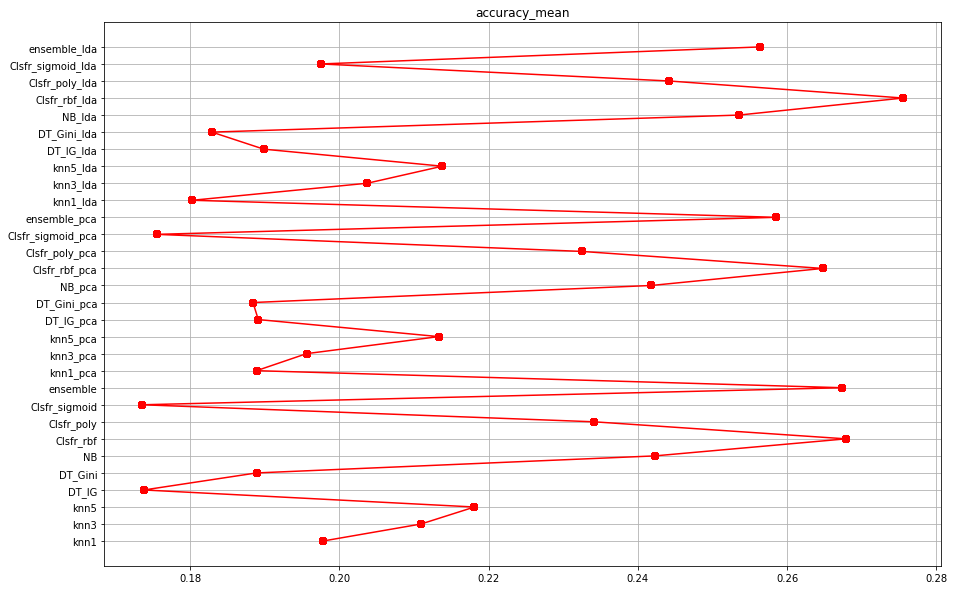

In [89]:
a = []
b = []
a = list(accuracy_mean.values())
b = list(accuracy_mean.keys())
plt.figure(figsize=(15, 10))
plt.plot(a,b,ls='-',marker='+',mew=8, color = "red")
plt.title('accuracy_mean')
plt.grid()
plt.show()

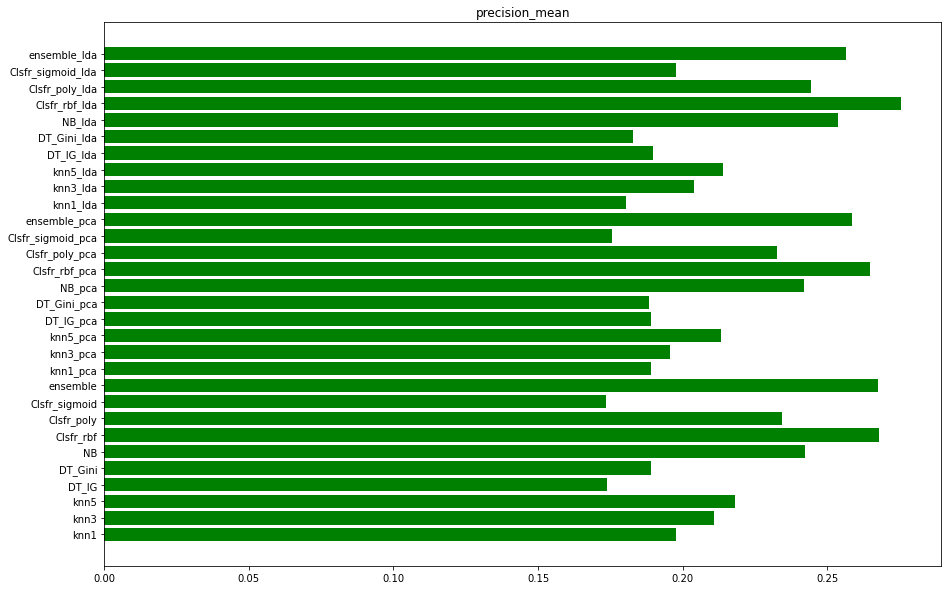

In [90]:
c = []
d = []
c = list(precision_mean.values())
d = list(precision_mean.keys())
plt.figure(figsize=(15, 10))
plt.barh(d, c, height = 0.8, color = "green")
plt.title('precision_mean')
plt.show()